In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics
from scipy import stats
from scipy.stats import wilcoxon, mannwhitneyu
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.linear_model import LinearRegression
import scipy
import os
from os.path import join
import pandas as pd

CURRENT_DIR = os.getcwd()
print(CURRENT_DIR)

import warnings
warnings.filterwarnings("ignore")

plt.style.use('CCB_plot_style_0v4.mplstyle');
c_styles      = mpl.rcParams['axes.prop_cycle'].by_key()['color']   # fetch the defined color styles
high_contrast = ['#004488', '#DDAA33', '#BB5566', '#000000']


Bad key text.latex.preview in file CCB_plot_style_0v4.mplstyle, line 55 ('text.latex.preview  : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file CCB_plot_style_0v4.mplstyle, line 63 ('mathtext.fallback_to_cm : True ## When True, use symbols from the Computer Modern fonts')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution


C:\Users\alexk\projects\GitHub\kcat_prediction\code\model_fitting


## 1. Plotting performance of different models:

### (a) Pearson r

In [2]:
models = ["str_fp", "diff_fp", "DRFP", "ESM1b", "ESM1b_ts", "ESM1b_ts_DRFP", "ESM1b_ts_DRFP_mean"]
model_names = {"str_fp" : "str. FP",
               "diff_fp" : "diff. FP",
               "ESM1b" : "ESM-1b",
               "DRFP" : "DRFP",
               "ESM1b_ts" : "ESM-$1b_{ESP}$",
               "ESM1b_ts_diff_fp" : "ESM-$1b_{ESP}$\n + diff. FP",
              "ESM1b_ts_DRFP": "ESM-$1b_{ESP}$\n + DRFP",
              "ESM1b_ts_DRFP_mean": "ESM-$1b_{ESP}$\n + DRFP (mean)"}

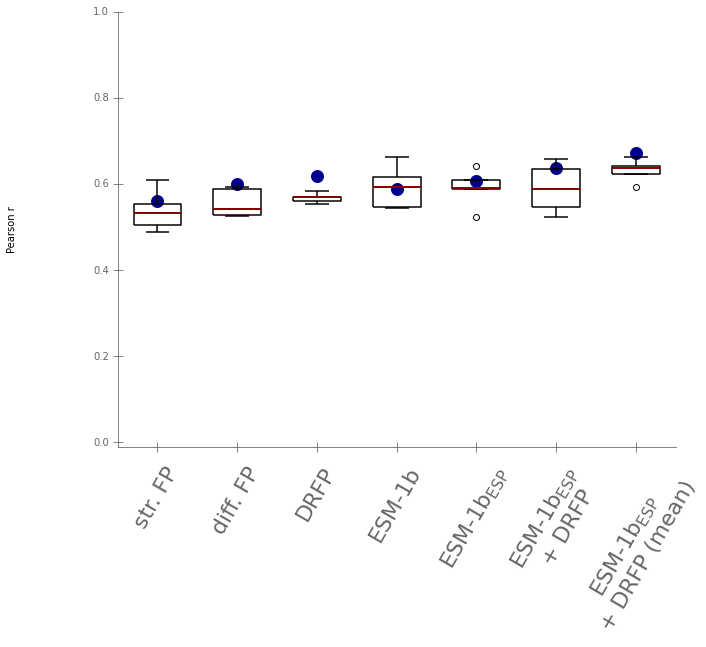

In [3]:
fig, ax = plt.subplots(figsize= (10,8))


plt.rcParams.update({'font.size': 28})
plt.ylim(-0.01, 1)
plt.xlim(0.5, len(models) + 0.5)

labs = [model_names[model] for model in models]
Boxplots = []
ticks = []
for i, model in enumerate(models):
    Pearson_CV = np.load(join("..", "..", "data", "training_results", "Pearson_CV_xgboost_" + model + ".npy"))
    MSE_CV = np.load(join("..", "..", "data",  "training_results", "MSE_CV_xgboost_" + model + ".npy"))
    R2_CV = np.load(join("..", "..", "data", "training_results", "R2_CV_xgboost_" + model + ".npy"))
    pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + model + ".npy"))
    test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + model + ".npy"))
    Pearson_test = stats.pearsonr(test_y, pred_y)[0]
    
    if i == 0:
        plt.scatter(i+1, Pearson_test, c='darkblue', marker="o", linewidths= 8, label = "test set")
    else:
        plt.scatter(i+1, Pearson_test, c='darkblue', marker="o", linewidths= 8)
        
    Boxplots.append(Pearson_CV)
    ticks.append(i+1)

        
plt.boxplot(Boxplots, positions=ticks,  widths=0.6,
           medianprops={"linewidth": 2,"solid_capstyle": "butt", "c" : "darkred"},
            boxprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           whiskerprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           capprops= {"linewidth": 1.5, "solid_capstyle": "butt"})




ax.locator_params(axis="y", nbins=8)

ticks1 = ticks
ax.set_xticks(ticks1)
ax.set_xticklabels([])
ax.tick_params(axis='x', which="major", length=10)
ax.tick_params(axis='y', length=10)
#ax.locator_params(axis="y", nbins=4)


ticks2 = list(np.array(ticks)-0.01)

ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y= -0.03, fontsize = 22)
ax.tick_params(axis='x', which="minor",length=0, rotation = 60)
#loc = plticker.MultipleLocator(base=0.02) # this locator puts ticks at regular intervals
#ax.yaxis.set_major_locator(loc)

plt.ylabel("Pearson r")
ax.yaxis.set_label_coords(-0.18, 0.5)
#plt.legend(loc = "upper right")
plt.show()

### (b) MSE

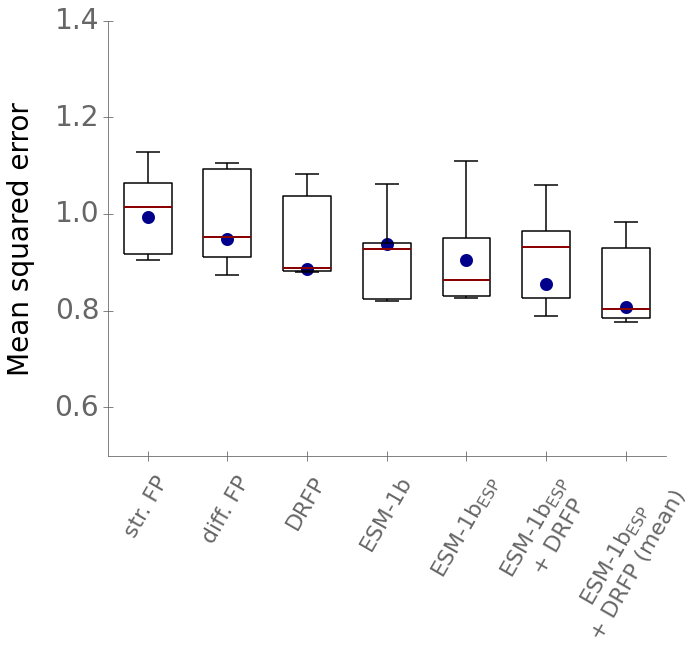

In [4]:
fig, ax = plt.subplots(figsize= (10,8))
plt.rcParams.update({'font.size': 28})
plt.ylim(0.5, 1.4)
plt.xlim(0.5, len(models) + 0.5)

labs = [model_names[model] for model in models]
Boxplots = []
ticks = []
for i, model in enumerate(models):
    Pearson_CV = np.load(join("..", "..", "data", "training_results", "Pearson_CV_xgboost_" + model + ".npy"))
    MSE_CV = np.load(join("..", "..", "data",  "training_results", "MSE_CV_xgboost_" + model + ".npy"))
    R2_CV = np.load(join("..", "..", "data", "training_results", "R2_CV_xgboost_" + model + ".npy"))
    pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + model + ".npy"))
    test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + model + ".npy"))
    MSE_test = np.mean(abs(test_y -  pred_y)**2)

    
    if i == 0:
        plt.scatter(i+1, MSE_test, c='darkblue', marker="o", linewidths= 8, label = "test set")
    else:
        plt.scatter(i+1, MSE_test, c='darkblue', marker="o", linewidths= 8)
        
    Boxplots.append(MSE_CV)
    ticks.append(i+1)

        
plt.boxplot(Boxplots, positions=ticks,  widths=0.6,
           medianprops={"linewidth": 2,"solid_capstyle": "butt", "c" : "darkred"},
            boxprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           whiskerprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           capprops= {"linewidth": 1.5, "solid_capstyle": "butt"})




ax.locator_params(axis="y", nbins=8)

ticks1 = ticks
ax.set_xticks(ticks1)
ax.set_xticklabels([])
ax.tick_params(axis='x', which="major", length=10)
ax.tick_params(axis='y', length=10)
#ax.locator_params(axis="y", nbins=4)


ticks2 = list(np.array(ticks)-0.01)

ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y= -0.03, fontsize = 22)
ax.tick_params(axis='x', which="minor",length=0, rotation = 60)
#loc = plticker.MultipleLocator(base=0.02) # this locator puts ticks at regular intervals
#ax.yaxis.set_major_locator(loc)

plt.ylabel("Mean squared error")
ax.yaxis.set_label_coords(-0.13, 0.5)
#plt.legend()
plt.savefig(join("..","..", "data", "figures", "boxplots_MSE.svg"))
plt.savefig(join("..","..", "data", "figures", "boxplots_MSE.png"))
plt.show()

### (c) Coefficients of determination

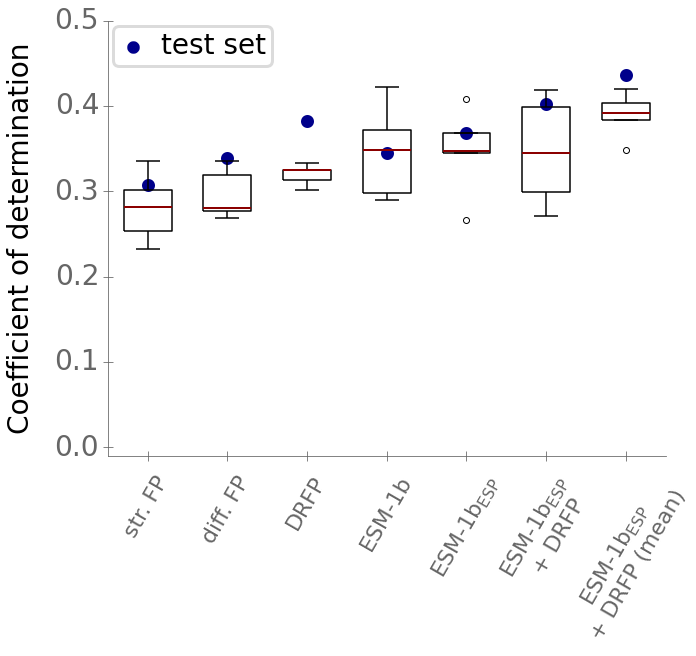

In [5]:
fig, ax = plt.subplots(figsize= (10,8))
plt.rcParams.update({'font.size': 28})
plt.ylim(-0.01, 0.5)
plt.xlim(0.5, len(models) + 0.5)

labs = [model_names[model] for model in models]
Boxplots = []
ticks = []
for i, model in enumerate(models):
    Pearson_CV = np.load(join("..", "..", "data", "training_results", "Pearson_CV_xgboost_" + model + ".npy"))
    MSE_CV = np.load(join("..", "..", "data",  "training_results", "MSE_CV_xgboost_" + model + ".npy"))
    R2_CV = np.load(join("..", "..", "data", "training_results", "R2_CV_xgboost_" + model + ".npy"))
    pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + model + ".npy"))
    test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + model + ".npy"))
    R2_test = r2_score(test_y, pred_y)

    
    if i == 0:
        plt.scatter(i+1, R2_test, c='darkblue', marker="o", linewidths= 8, label = "test set")
    else:
        plt.scatter(i+1, R2_test, c='darkblue', marker="o", linewidths= 8)
        
    Boxplots.append(R2_CV)
    ticks.append(i+1)

        
plt.boxplot(Boxplots, positions=ticks,  widths=0.6,
           medianprops={"linewidth": 2,"solid_capstyle": "butt", "c" : "darkred"},
            boxprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           whiskerprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           capprops= {"linewidth": 1.5, "solid_capstyle": "butt"})



ax.locator_params(axis="y", nbins=8)

ticks1 = ticks
ax.set_xticks(ticks1)
ax.set_xticklabels([])
ax.tick_params(axis='x', which="major", length=10)
ax.tick_params(axis='y', length=10)
#ax.locator_params(axis="y", nbins=4)


ticks2 = list(np.array(ticks)-0.01)

ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y= -0.03, fontsize = 22)
ax.tick_params(axis='x', which="minor",length=0, rotation = 60)

plt.ylabel("Coefficient of determination")
ax.yaxis.set_label_coords(-0.13, 0.5)

leg = plt.legend(loc = "upper left", frameon=True)
leg.get_frame().set_linewidth(3.0)
plt.savefig(join("..","..", "data", "figures", "boxplots_R2.svg"))
plt.savefig(join("..","..", "data", "figures", "boxplots_R2.png"))
plt.show()

### (d) Statistical tests

In [6]:
models

['str_fp',
 'diff_fp',
 'DRFP',
 'ESM1b',
 'ESM1b_ts',
 'ESM1b_ts_DRFP',
 'ESM1b_ts_DRFP_mean']

In [7]:
pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + models[0] + ".npy"))
test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + models[0] + ".npy"))
errors_str_fp = abs(pred_y-test_y)

pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + models[1] + ".npy"))
test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + models[1] + ".npy"))
errors_diff_fp = abs(pred_y-test_y)

pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + models[2] + ".npy"))
test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + models[2] + ".npy"))
errors_drfp = abs(pred_y-test_y)

pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + models[3] + ".npy"))
test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + models[3] + ".npy"))
errors_esm1b = abs(pred_y-test_y)

pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + models[4] + ".npy"))
test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + models[4] + ".npy"))
errors_esm1b_ts = abs(pred_y-test_y)

pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + models[5] + ".npy"))
test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + models[5] + ".npy"))
errors_esm1b_drfp = abs(pred_y-test_y)

pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + models[6] + ".npy"))
test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + models[6] + ".npy"))
errors_esm1b_drfp_mean = abs(pred_y-test_y)

In [8]:
d = errors_esm1b_drfp_mean - errors_esm1b_ts
w, p = wilcoxon(d, alternative='less')
print("Difference between predictions with ESM1b/DRFP(mean) and ESM1b_ts", p)

d = errors_esm1b_drfp_mean - errors_esm1b
w, p = wilcoxon(d, alternative='less')
print("Difference between predictions with ESM1b/DRFP(mean) and ESM1b", p)

d = errors_esm1b_drfp_mean - errors_drfp
w, p = wilcoxon(d, alternative='less')
print("Difference between predictions with ESM1b/DRFP(mean) and DRFP", p)

d = errors_esm1b_ts - errors_esm1b
w, p = wilcoxon(d, alternative='less')
print("Difference between predictions with ESM1b_ts and ESM1b", p)

d = errors_drfp- errors_str_fp
w, p = wilcoxon(d, alternative='two-sided')
print("Difference between predictions with DRFP and str.fp (two-sided)", p)

d = errors_drfp- errors_diff_fp
w, p = wilcoxon(d, alternative='two-sided')
print("Difference between predictions with DRFP and diff.fp (two-sided)", p)

Difference between predictions with ESM1b/DRFP(mean) and ESM1b_ts 1.177364363105206e-07
Difference between predictions with ESM1b/DRFP(mean) and ESM1b 0.0015088024807966155
Difference between predictions with ESM1b/DRFP(mean) and DRFP 0.004861912227347217
Difference between predictions with ESM1b_ts and ESM1b 0.40887357002408387
Difference between predictions with DRFP and str.fp (two-sided) 0.0002605996952975724
Difference between predictions with DRFP and diff.fp (two-sided) 0.06363682244584662


## 2. Plotting predictions versus experimental values:

Loading predictions for the best model (ESM1b/diff. fp)

In [9]:
model = "ESM1b_ts_DRFP_mean"

pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + model + ".npy"))
test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + model + ".npy"))

data_test = pd.read_pickle(join("..", "..", "data", "kcat_data", "splits", "test_df_kcat.pkl"))
data_test["n_values"] = [len(data_test["kcat_values"][ind]) for ind in data_test.index]
n_values = np.array([len(data_test["kcat_values"][ind]) for ind in data_test.index])

In [10]:
np.mean(abs(pred_y-test_y)), 10**np.mean(abs(pred_y-test_y))

(0.6850700979619714, 4.842505224693218)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


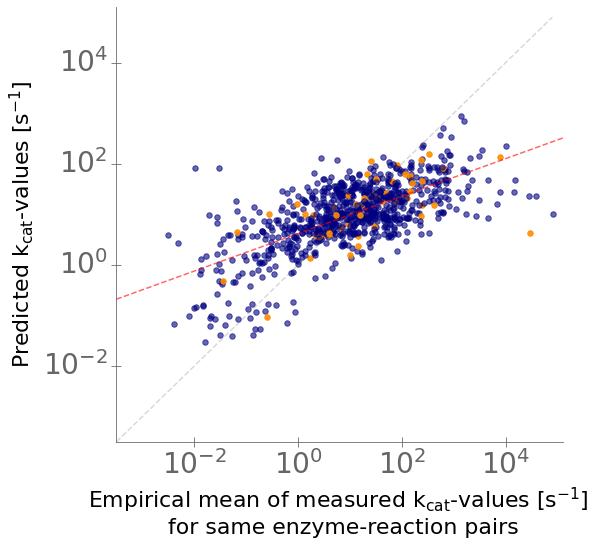

(0.06823529411764706, 0.027777777777777776)

In [11]:
fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({'font.size': 28})




plt.ylim(ymax = 5.1, ymin = -3.5)
plt.xlim(xmax = 5.1, xmin = -3.5)

ax.tick_params(axis='x', length=10)
ax.tick_params(axis='y', length=10)

ax.yaxis.set_label_coords(-0.18, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

plt.xticks([-2,0,2,4], ["$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$"])
plt.yticks([-2,0,2,4], ["$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$"])



reg = LinearRegression().fit(test_y.reshape(-1,1), pred_y.reshape(-1,1),)
reg.score(test_y.reshape(-1,1), pred_y.reshape(-1,1))
beta0, beta1 =reg.intercept_[0], reg.coef_[0][0]
plt.plot([-3.5,4.9], [-3.5,4.9], color='grey', alpha = 0.3, linestyle='dashed')
plt.plot([-3.5,5.1], [beta0 + -3.5*beta1, beta0 + 5.1*beta1], color='red', alpha = 0.6, linestyle='dashed')

plt.ylabel("Predicted $k_{cat}$-values [$s^{-1}$]", fontsize = 22)
plt.xlabel("Empirical mean of measured $k_{cat}$-values [$s^{-1}$] \n \
for same enzyme-reaction pairs", fontsize = 22)

for i in range(len(test_y)):
    if n_values[i] <= 2:
        plt.scatter(test_y[i], pred_y[i], alpha = 0.6, s=30, c="navy")
    else:
        plt.scatter(test_y[i], pred_y[i], alpha = 0.9, s=30, c="darkorange")
    

plt.savefig(join("..","..", "data", "figures", "scatter_plot.eps"))
plt.show()
np.mean(n_values > 2 ), np.mean(n_values[test_y < 1e-1] > 2)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


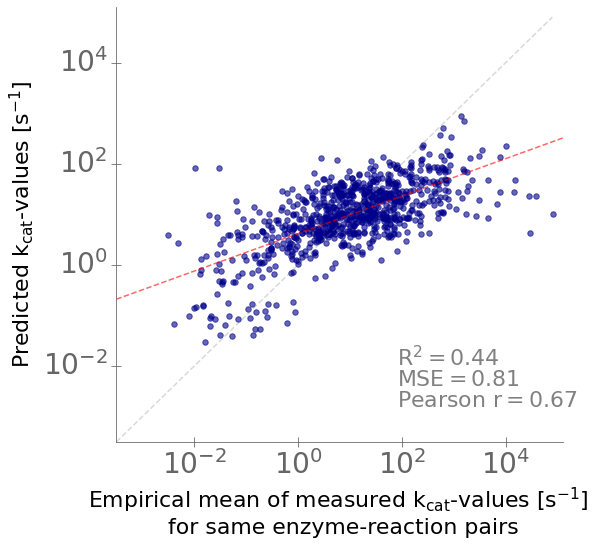

In [12]:
fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({'font.size': 28})




plt.ylim(ymax = 5.1, ymin = -3.5)
plt.xlim(xmax = 5.1, xmin = -3.5)

ax.tick_params(axis='x', length=10)
ax.tick_params(axis='y', length=10)
ax.text(1.9, -2, r'$R^2=0.44$', fontsize=22, c = "grey")
ax.text(1.9, -2.4, r'$MSE=0.81$', fontsize=22, c = "grey")
ax.text(1.9, -2.8, r'Pearson $r=0.67$', fontsize=22, c = "grey")

ax.yaxis.set_label_coords(-0.18, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

plt.xticks([-2,0,2,4], ["$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$"])
plt.yticks([-2,0,2,4], ["$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$"])



reg = LinearRegression().fit(test_y.reshape(-1,1), pred_y.reshape(-1,1),)
reg.score(test_y.reshape(-1,1), pred_y.reshape(-1,1))
beta0, beta1 =reg.intercept_[0], reg.coef_[0][0]
plt.plot([-3.5,4.9], [-3.5,4.9], color='grey', alpha = 0.3, linestyle='dashed')
plt.plot([-3.5,5.1], [beta0 + -3.5*beta1, beta0 + 5.1*beta1], color='red', alpha = 0.6, linestyle='dashed')

plt.ylabel("Predicted $k_{cat}$-values [$s^{-1}$]", fontsize = 22)
plt.xlabel("Empirical mean of measured $k_{cat}$-values [$s^{-1}$] \n \
for same enzyme-reaction pairs", fontsize = 22)
plt.scatter(test_y, pred_y, alpha = 0.6, s=30, c="darkblue")
plt.savefig(join("..","..", "data", "figures", "scatter_plot.eps"))
plt.show()

## 3. Comparison to the results of the DLkcat model

In [13]:
model = "ESM1b_ts_DRFP_mean"

pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + model + ".npy"))
test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + model + ".npy"))
data_train = pd.read_pickle(join("..", "..", "data", "kcat_data", "splits", "train_df_kcat.pkl"))
data_test = pd.read_pickle(join("..", "..", "data", "kcat_data", "splits", "test_df_kcat.pkl"))
data_test["y_true"] = test_y
data_test["y_pred"] = pred_y

#### (a) First, we need to calculate the maximal sequence identity for all proteins in the test set compared to all proteins in the training set:

##### (a)(i) Creating a fasta file for every sequence in the training set and for every sequence in the test set:

In [14]:
'''for ind in data_test.index:
    ofile = open(join("..", "..", "data", "enzyme_data", "fasta_files", 
                      "test_seq_" + str(ind) + ".fasta"), "w")
    ofile.write("> seq_test_" + str(ind) + "\n" + data_test["Sequence"][ind] + "\n")
    ofile.close()
    
    
train_sequences = list(set(data_train["Sequence"]))
for ind, seq in enumerate(train_sequences):
    ofile = open(join("..", "..", "data", "enzyme_data", "fasta_files", 
                      "train_seq_" + str(ind) + ".fasta"), "w")
    ofile.write("> seq_train_" + str(ind) + "\n" + seq + "\n")
    ofile.close()''';

##### (a)(ii) Calculating the maximal pairwise sequence identities (Calculations were done on a HPC):

In [15]:
'''from Bio.Emboss.Applications import NeedleCommandline
import os
from os.path import join
import pandas as pd
import sys
import time
import numpy as np


arg = int(sys.argv[1])

CURRENT_DIR = join("..", "..", "data", "enzyme_data", "fasta_files")
    
def calculate_identity(fasta_file_1, fasta_file_2):
    needle_cline = NeedleCommandline(asequence = fasta_file_1, bsequence = fasta_file_2,
                                     gapopen=10, gapextend=0.5,  filter = True)

    out = needle_cline()[0]
    out = out[out.find("Identity"):]
    out = out[:out.find("\n")]
    percent = float(out[out.find("(")+1 :out.find(")")-1].replace(" ", ""))
    return(percent)


identities = []
for i in range(len(data_test)):
    ident = calculate_identity(fasta_file_1 = join(CURRENT_DIR, "test_seq_" + str(arg) + ".fasta"),
               fasta_file_2 = join(CURRENT_DIR, "train_seq_" + str(i) + ".fasta"))
    identities.append(ident)


ofile = open(join("..", "..", "data", "enzyme_data", "kcat_ident", "test_seq" + str(arg) + ".txt"), "w")
ofile.write(str(max(identities)))
ofile.close()''';

##### (a)(iii) Mapping the results to the test DataFrame

In [16]:
data_test["max_ident"] = np.nan

for ind in data_test.index:
    try:
        with open(join("..", "..", "data", "enzyme_data", "kcat_ident", "test_seq" + str(ind) + ".txt")) as f:
            ident = f.readlines()
            ident = float(ident[0])
            
            
        data_test["max_ident"][ind] = ident
    except FileNotFoundError:
        pass
data_test.head()

,Reaction ID,Sequence ID,kcat_values,Uniprot IDs,from_BRENDA,from_Sabio,from_Uniprot,checked,Sequence,substrates,...,ESM1b,ESM1b_ts,geomean_kcat,frac_of_max_UID,frac_of_max_RID,frac_of_max_EC,DRFP,y_true,y_pred,max_ident
0,Reaction_3207,Sequence_2150,[219],[B9W4V6],[1],[0],[0],[False],MKYFPLFPTLVFAARVVAFPAYASLAGLSQQELDAIIPTLEAREPG...,{InChI=1S/C7H5NO4/c9-8(10)5-1-2-6-7(3-5)12-4-1...,...,"[0.020693962, 0.16804111, 0.0377352, 0.1768811...","[0.83155197, 0.08632717, -0.42143562, 0.419359...",2.340444,0.665653,1.000000,0.114660,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.340444,0.781544,20.8
1,Reaction_3629,Sequence_3212,[0.92],[Q0PC20],[1],[0],[0],[False],MMKIAILGAMSEEITPLLETLKDYTKIEHANNTYYFAKYKNHELVL...,"{InChI=1S/H2O/h1H2, InChI=1S/C10H13N5O3/c1-4-6...",...,"[0.07429815, 0.14984865, -0.08539086, 0.098546...","[0.13206507, -0.10826899, -0.31126085, 0.95038...",-0.036212,0.340741,1.000000,0.090196,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-0.036212,0.537214,35.3
2,Reaction_375,Sequence_26,[21.0],[Q0GYU4],[0],[1],[0],[False],MASKTYTLNTGAKIPAVGFGTFANEGAKGETYAAVTKALDVGYRHL...,"{InChI=1S/C4H8O2/c1-3(5)4(2)6/h3,5H,1-2H3, InC...",...,"[-0.0272103, 0.2500836, 0.08181338, 0.03990136...","[0.3617253, 0.8765441, -1.0668296, 1.5401511, ...",1.322219,0.175000,0.147887,1.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",1.322219,0.927225,40.1
3,Reaction_4312,Sequence_3788,[4.4],[Q8ZNC4],[0],[0],[1],[False],MTDSIMQNYNQLREQVINGDRRFQHKDGHLCFEGVDLDALARQYPT...,"{InChI=1S/p+1, InChI=1S/C6H14N2O2/c7-4-2-1-3-5...",...,"[0.079942256, 0.23130149, -0.012637342, 0.0787...","[0.7798445, -0.7589981, -0.2779501, 0.2643281,...",0.643453,1.000000,1.000000,1.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.643453,0.959929,25.9
4,Reaction_2115,Sequence_712,[4.5],[P53602],[1],[0],[0],[False],MASEKPLAAVTCTAPVNIAVIKYWGKRDEELVLPINSSLSVTLHQD...,"{InChI=1S/C6H14O10P2/c1-6(9,4-5(7)8)2-3-15-18(...",...,"[0.086191244, 0.21010432, 0.1960825, -0.041225...","[-0.6100984, -0.054886594, -0.09893316, 0.2822...",0.653213,1.000000,0.849057,0.112500,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.653213,0.933098,49.3


#### (b) Using kcat values from the most similar enzymes from the training set as predictions:

In [17]:
def get_train_seq(ind):
    ofile = open(join("..", "..", "data", "enzyme_data", "fasta_files", 
                      "train_seq_" + str(ind) + ".fasta"), "r")
    return(ofile.readlines()[1].replace("\n", ""))

data_test["sim_pred"] = np.nan

for ind in data_test.index:
    try:
        with open(join("..", "..", "data","enzyme_data", "kcat_similar", "test_seq" + str(ind) + ".txt")) as f:
            ident = f.readlines()
            indices = ident[0].split(" ")
            indices = [int(float(k)) for k in indices[1:]]
            
            kcats = []
            Sequences = [get_train_seq(k) for k in indices]
            for seq in Sequences:
                kcats = kcats + list(data_train["geomean_kcat"].loc[data_train["Sequence"] == seq])
            
        data_test["sim_pred"][ind] = np.mean(kcats[:3])
    except:
        pass
data_test.head(1)

,Reaction ID,Sequence ID,kcat_values,Uniprot IDs,from_BRENDA,from_Sabio,from_Uniprot,checked,Sequence,substrates,...,ESM1b_ts,geomean_kcat,frac_of_max_UID,frac_of_max_RID,frac_of_max_EC,DRFP,y_true,y_pred,max_ident,sim_pred
0,Reaction_3207,Sequence_2150,[219],[B9W4V6],[1],[0],[0],[False],MKYFPLFPTLVFAARVVAFPAYASLAGLSQQELDAIIPTLEAREPG...,{InChI=1S/C7H5NO4/c9-8(10)5-1-2-6-7(3-5)12-4-1...,...,"[0.83155197, 0.08632717, -0.42143562, 0.419359...",2.340444,0.665653,1.0,0.11466,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.340444,0.781544,20.8,2.024332


In [18]:
data_test = data_test.loc[~pd.isnull(data_test["sim_pred"])]

#### (b) Comparing the results with predictions from the DLkcat paper:

##### (b)(i) Loading results from DLkcat paper

In [19]:
data_test_DLkcat = pd.read_pickle(join("..", "..", "data", "DLkcat", "df_pred.pkl"))
data_test_DLkcat.head()

,y_true,y_pred,Sequence,max_ident,sim_pred,sim_pred_1,sim_pred_3
0,-2.207608,-0.071899,MSAIDCIITAAGLSSRMGQWKMMLPWEQGTILDTSIKNALQFCSRI...,22.8,-1.486273,-2.275724,-1.486273
1,-3.657577,-2.707640,MKEFYLTVEQIGDSIFERYIDSNGRERTREVEYKPSLFAHCPESQA...,100.0,-2.369079,-2.221849,-2.369079
2,0.949390,0.831021,MSPSKMNATVGSTSEVEQKIRQELALSDEVTTIRRNAPAAVLYEDG...,100.0,0.946618,1.230449,0.455934
3,1.672098,1.513026,MKNVGFIGWRGMVGSVLMQRMVEERDFDAIRPVFFSTSQLGQAAPS...,100.0,1.045579,1.672098,1.045579
4,-1.790485,-2.830310,MATSTETISSLAQPFVHLENPINSPLVKETIRPRNDTTITPPPTQW...,99.4,-1.733113,0.995635,-1.733113


In [20]:
help_df =data_test_DLkcat

y_true = np.array(help_df["y_true"])
y_pred = np.array(help_df["sim_pred"])
abs_error_sim = abs(y_true - y_pred)
R2_sim =  r2_score(y_true, y_pred)
print(R2_sim)

y_true = np.array(help_df["y_true"])
y_pred = np.array(help_df["y_pred"])
abs_error = abs(y_true - y_pred)
R2 =  r2_score(y_true, y_pred)
print(R2)

d = abs_error- abs_error_sim
w, p = wilcoxon(d, alternative='less')
print(p)

d = abs_error- abs_error_sim
w, p = wilcoxon(d, alternative='two-sided')
print(p)

0.45244626585841485
0.44447253110852536
0.003277284826373785
0.00655456965274757


##### (b)(ii) Plotting performances for different sequence identities:

In [21]:
help_df =data_test

y_true = np.array(help_df["y_true"])
y_pred = np.array(help_df["sim_pred"])
abs_error_sim = abs(y_true - y_pred)
R2_sim =  r2_score(y_true, y_pred)
print(R2_sim)

y_true = np.array(help_df["y_true"])
y_pred = np.array(help_df["y_pred"])
abs_error = abs(y_true - y_pred)
R2 =  r2_score(y_true, y_pred)
print(R2)

d = abs_error- abs_error_sim
w, p = wilcoxon(d, alternative='less')
print(p)

0.239011719049261
0.43631116846784246
1.1460586039980551e-05


In [22]:
splits = ["0-40%", "40-80%", "80-99%","99-100%"]
lower_bounds = [0,40,80,99]
upper_bounds = [40,80,99,100]

points1 ,points1_sim = [], []
points2, points2_sim = [], []
n_points1, n_points2 = [], []
n_points1_sim, n_points2_sim = [], []

for i, split in enumerate(splits):

    lb, ub = lower_bounds[i], upper_bounds[i]
    
    help_df = data_test.loc[data_test["max_ident"]>= lb].loc[data_test["max_ident"]<= ub]
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["y_pred"])
    n_kcat = len(y_pred)
    R2 =  r2_score(y_true, y_pred)
    abs_error = abs(y_true - y_pred)
    
    
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["sim_pred"])
    n_kcat_sim = len(y_pred)
    R2_sim =  r2_score(y_true, y_pred)
    abs_error_sim = abs(y_true - y_pred)
    
    help_df = data_test_DLkcat.loc[data_test_DLkcat["max_ident"]>= lb].loc[data_test_DLkcat["max_ident"]<= ub]
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["y_pred"])
    n_DLkcat = len(y_pred)
    R2_DLkcat =  r2_score(y_true, y_pred)
    abs_error_DLkcat = abs(y_true - y_pred)
    
    
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["sim_pred"])
    n_kcat_DLkcat_sim = len(y_pred)
    R2_DLkcat_sim =  r2_score(y_true, y_pred)
    abs_error_DLkcat_sim = abs(y_true - y_pred)
    
    
    
    points1.append(R2)
    points1_sim.append(R2_sim)
    points2.append(R2_DLkcat)
    points2_sim.append(R2_DLkcat_sim)
    
    n_points1.append(n_kcat)
    n_points1_sim.append(n_kcat_sim)
    n_points2.append(n_DLkcat)
    n_points2_sim.append(n_kcat_DLkcat_sim)
    
    d = abs_error- abs_error_sim
    w, p = wilcoxon(d, alternative='less')
    
    d_DLkcat = abs_error_DLkcat- abs_error_DLkcat_sim
    w, p_DLkcat = wilcoxon(d_DLkcat, alternative='less')
    w, p_DLkcat_two_sided = wilcoxon(d_DLkcat, alternative='two-sided')
    
    print("%s TurNuP: R2:%s, Similarity method: %s, p = %s " % (split, R2, R2_sim, p))
    print("%s DLKcat: R2:%s, Similarity method: %s, p = %s, p(two-sided) = %s" % (split,  R2_DLkcat, R2_DLkcat_sim, p_DLkcat, p_DLkcat_two_sided))


0-40% TurNuP: R2:0.3282062960029778, Similarity method: 0.016279639392235312, p = 3.3778532715996525e-09 
0-40% DLKcat: R2:-0.6072304105234347, Similarity method: 0.10837547424294935, p = 0.9957653015502506, p(two-sided) = 0.008469396899498782
40-80% TurNuP: R2:0.5293866492629986, Similarity method: 0.4960913599652834, p = 0.5531581331990386 
40-80% DLKcat: R2:0.34280134977895493, Similarity method: 0.1800891304717046, p = 0.5174532691949906, p(two-sided) = 0.9650934616100189
80-99% TurNuP: R2:0.688850177486657, Similarity method: 0.7281503207725486, p = 0.9851054666995749 
80-99% DLKcat: R2:0.48622435213243465, Similarity method: 0.3392639181110536, p = 0.8129782958108247, p(two-sided) = 0.3740434083783506
99-100% TurNuP: R2:0.6749766930471568, Similarity method: 0.20645953288274277, p = 0.0023424625396728516 
99-100% DLKcat: R2:0.5128517542754034, Similarity method: 0.48197442980722505, p = 6.379793252512187e-05, p(two-sided) = 0.00012759586505024374


In [23]:
abs_error_turnup = abs(np.array(data_test["y_pred"])- np.array(data_test["y_true"]))
abs_error_sim = abs(np.array(data_test["sim_pred"])- np.array(data_test["y_true"]))
mannwhitneyu(abs_error_turnup, abs_error_sim, alternative="less")

MannwhitneyuResult(statistic=338596.0, pvalue=0.012594610167587074)

0-40% 0.3282062960029778 0.016279639392235312 -0.6072304105234347 0.10837547424294935
40-80% 0.5293866492629986 0.4960913599652834 0.34280134977895493 0.1800891304717046
80-99% 0.688850177486657 0.7281503207725486 0.48622435213243465 0.3392639181110536
99-100% 0.6749766930471568 0.20645953288274277 0.5128517542754034 0.48197442980722505


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


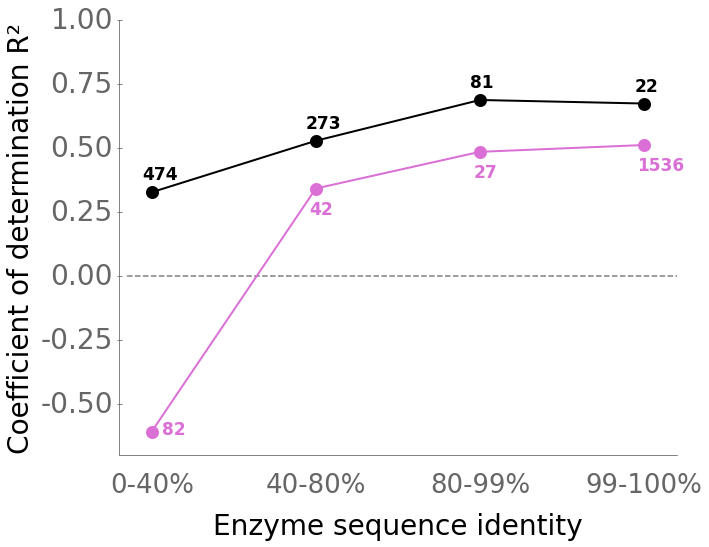

In [24]:
fig, ax = plt.subplots(figsize= (10,8))
plt.rcParams.update({'font.size': 28})

splits = ["0-40%", "40-80%", "80-99%","99-100%"]
lower_bounds = [0,40,80,99]
upper_bounds = [40,80,99,100]

points1 ,points1_sim = [], []
points2, points2_sim = [], []
n_points1, n_points2 = [], []
n_points1_sim, n_points2_sim = [], []

for i, split in enumerate(splits):

    lb, ub = lower_bounds[i], upper_bounds[i]
    
    help_df = data_test.loc[data_test["max_ident"]>= lb].loc[data_test["max_ident"]<= ub]
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["y_pred"])
    n_kcat = len(y_pred)
    R2 =  r2_score(y_true, y_pred)
    abs_error = abs(y_true - y_pred)
    
    
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["sim_pred"])
    n_kcat_sim = len(y_pred)
    R2_sim =  r2_score(y_true, y_pred)
    abs_error_sim = abs(y_true - y_pred)
    
    help_df = data_test_DLkcat.loc[data_test_DLkcat["max_ident"]>= lb].loc[data_test_DLkcat["max_ident"]<= ub]
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["y_pred"])
    n_DLkcat = len(y_pred)
    R2_DLkcat =  r2_score(y_true, y_pred)
    abs_error_DLkcat = abs(y_true - y_pred)
    
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["sim_pred"])
    n_kcat_DLkcat_sim = len(y_pred)
    R2_DLkcat_sim =  r2_score(y_true, y_pred)
    abs_error_DLkcat_sim = abs(y_true - y_pred)
    

    print(split, R2, R2_sim, R2_DLkcat, R2_DLkcat_sim)
    points1.append(R2)
    points1_sim.append(R2_sim)
    points2.append(R2_DLkcat)
    points2_sim.append(R2_DLkcat_sim)
    
    n_points1.append(n_kcat)
    n_points1_sim.append(n_kcat_sim)
    n_points2.append(n_DLkcat)
    n_points2_sim.append(n_kcat_DLkcat_sim)


ticks2 = np.array(range(len(splits)))
labs = splits
ax.set_xticks(ticks2)
ax.set_xticklabels(labs,  y= -0.03, fontsize=26)
ax.tick_params(axis='x', length=0, rotation = 0)

plt.ylim((-0.7,1))
plt.xlim((-0.2, 3.2))
plt.legend(loc = "lower right", fontsize=20)
plt.ylabel('Coefficient of determination R²')
plt.xlabel('Enzyme sequence identity')
ax.yaxis.set_label_coords(-0.15, 0.5)
ax.xaxis.set_label_coords(0.5,-0.13)

plt.plot([-0.15,4], [0,0], color='grey', linestyle='dashed')


plt.plot([0,1,2,3], points1, c= "black", linewidth=2)
plt.plot([0,1,2,3], points2, c= "orchid", linewidth=2)

for i, split in enumerate(splits):
    points1.append(R2)
    points2.append(R2_DLkcat)
    
    if i ==0:
        plt.scatter(i, points1[i], c='black', marker="o", linewidths= 8, label ="KCATpred")
        plt.scatter(i, points2[i], c='orchid', marker="o", linewidths= 8, label ="DLkcat")
        ax.annotate(n_points1[i], (i-0.06, points1[i]+0.05), fontsize=17, c= "black", weight = "bold")
        ax.annotate(n_points2[i], (i+0.06, points2[i]-0.01), fontsize=17, c='orchid', weight = "bold")

    else:
        plt.scatter(i, points1[i], c='black', marker="o", linewidths= 8)
        plt.scatter(i, points2[i], c='orchid', marker="o", linewidths= 8)
        ax.annotate(n_points1[i], (i-0.06, points1[i]+0.05), fontsize=17, c= "black", weight = "bold")
        ax.annotate(n_points2[i], (i-0.04, points2[i]-0.10), fontsize=17, c='orchid', weight = "bold")
            


            
plt.savefig(join("..","..", "data", "figures", "comparison_DLKcat.svg"))
plt.savefig(join("..","..", "data", "figures", "comparison_DLKcat.png"))
plt.show()

#### Testing if differences in model performance is statistically significant using a one-sided Mann-Whitney U test

In [25]:


splits = ["0-40%", "40-80%", "80-99%","99-100%"]
lower_bounds = [0,40,80,99,0]
upper_bounds = [40,80,99,100,100]

for i, split in enumerate(splits):

    lb, ub = lower_bounds[i], upper_bounds[i]
    
    help_df = data_test.loc[data_test["max_ident"]>= lb].loc[data_test["max_ident"]<= ub]
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["y_pred"])
    n_kcat = len(y_pred)
    R2 =  r2_score(y_true, y_pred)
    abs_error = abs(y_true - y_pred)
    
    help_df = data_test_DLkcat.loc[data_test_DLkcat["max_ident"]>= lb].loc[data_test_DLkcat["max_ident"]<= ub]
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["y_pred"])
    n_DLkcat = len(y_pred)
    R2_DLkcat =  r2_score(y_true, y_pred)
    abs_error_DLkcat = abs(y_true - y_pred)
    
    res = mannwhitneyu(abs_error, abs_error_DLkcat, alternative="less")
    print(split, res)

0-40% MannwhitneyuResult(statistic=10717.0, pvalue=4.3070137916732266e-11)
40-80% MannwhitneyuResult(statistic=4127.0, pvalue=0.0017400394232513574)
80-99% MannwhitneyuResult(statistic=617.0, pvalue=0.0003661062666722406)
99-100% MannwhitneyuResult(statistic=13408.0, pvalue=0.048009706357389804)


### Predicting Proteom allocation

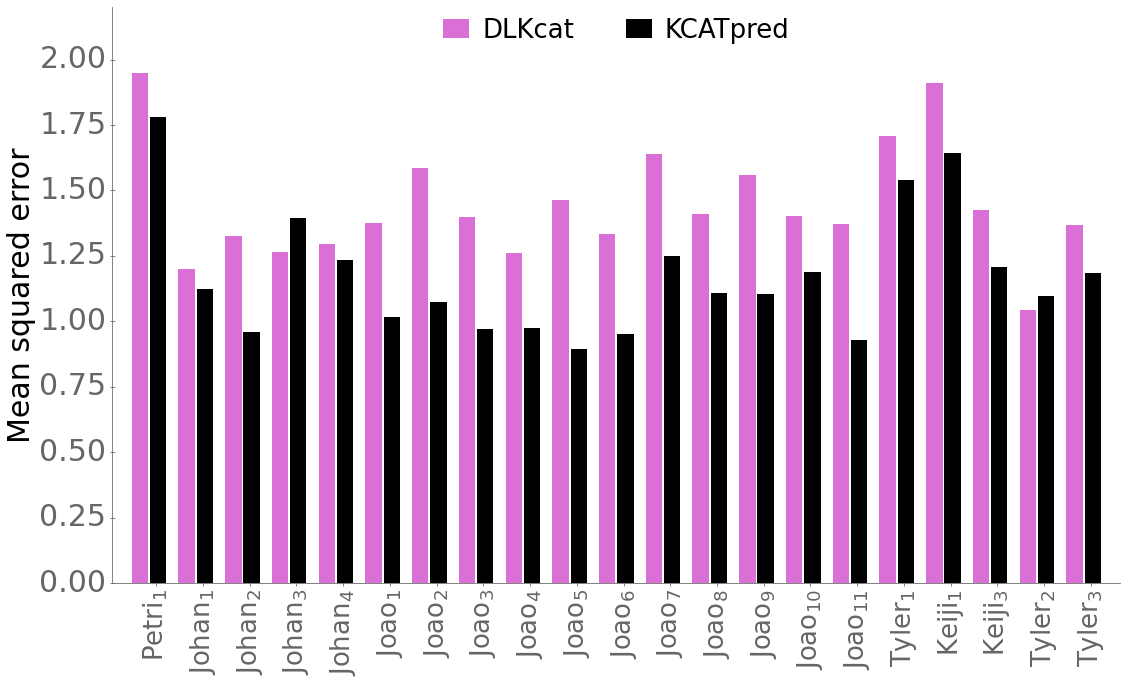

In [26]:
fig, ax = plt.subplots(figsize= (14,8))
plt.rcParams.update({'font.size': 28})

conditions = ["$Petri_1$", "$Johan_1$", "$Johan_2$", "$Johan_3$", "$Johan_4$",
              "$Joao_1$", "$Joao_2$", "$Joao_3$", "$Joao_4$", "$Joao_5$", "$Joao_6$",
              "$Joao_7$", "$Joao_8$", "$Joao_9$", "$Joao_{10}$", "$Joao_{11}$", "$Tyler_1$",
              "$Keiji_1$","$Keiji_3$", "$Tyler_2$", "$Tyler_3$"]


data = [[1.3958, 1.0951, 1.1511, 1.1255, 1.1380, 1.1731, 1.2599, 1.1834, 1.1232,
         1.2105, 1.1553, 1.2801, 1.1873, 1.2479, 1.1843, 1.1711, 1.3075, 1.3824, 1.1935,1.0210, 1.1693],
        [ 1.3348, 1.0608, 0.9795, 1.1813, 1.1117, 1.0074, 1.0357, 0.9859, 0.9882,
         0.9457, 0.9748, 1.1171, 1.0519, 1.0512, 1.0897, 0.9635, 1.2411, 1.2818, 1.0986 ,1.0474, 1.0883]]

X = np.arange(len(conditions))
ax = fig.add_axes([0,0,1,1])

barWidth = 0.35
eps = 0.04

plt.xticks([r + barWidth for r in range(len(data[0]))], conditions, rotation = 90, fontsize=26)
plt.yticks( fontsize=30)

ax.bar(X + 0.00, np.array(data[0])**2, color = 'orchid', width = barWidth, label = "DLKcat")
ax.bar(X + barWidth + eps, np.array(data[1])**2, color = 'black', width = barWidth, label = "KCATpred")

plt.ylabel('Mean squared error', fontsize=30)
plt.legend(loc = "upper center", ncol = 2, fontsize=26)
plt.ylim((0,2.2))

plt.savefig(join("..","..", "data", "figures", "comparison_DLKCcat_proteome.svg"))
plt.show()

### Plotting orginal kcat values and log10-transformed kcat values

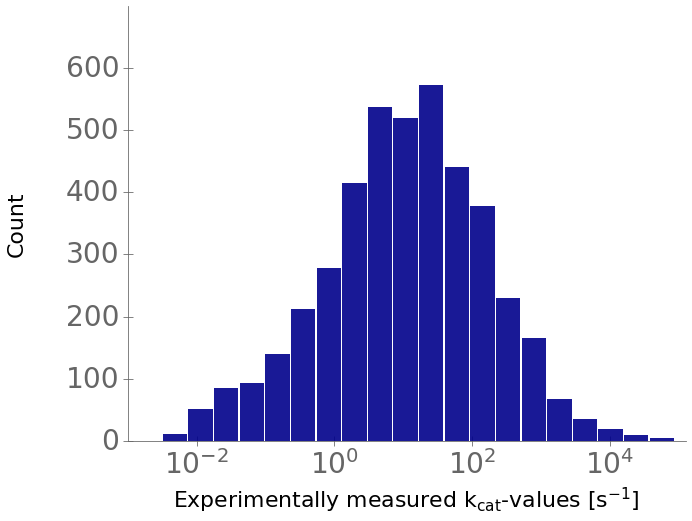

In [27]:
df_kcat = pd.read_pickle(join("..", "..", "data", "kcat_data", "final_kcat_dataset.pkl"))
kcat_values = 10**np.array(df_kcat["geomean_kcat"])
log10_kcat_values = np.array(df_kcat["geomean_kcat"])

fig, ax = plt.subplots(figsize= (10,8))
plt.rcParams.update({'font.size': 28})


plt.ylim(ymax = 699, ymin = 0)
plt.xlim(xmax = 5.1, xmin = -3)

ax.tick_params(axis='x', length=10)
ax.tick_params(axis='y', length=10)

ax.yaxis.set_label_coords(-0.18, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

plt.xticks([-2,0,2,4], ["$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$"])
#plt.yticks([-2,0,2,4], ["$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$"])

plt.ylabel("Count", fontsize = 22)
plt.xlabel("Experimentally measured $k_{cat}$-values [$s^{-1}$]", fontsize = 22)
plt.hist(log10_kcat_values, alpha = 0.9, color="darkblue",rwidth = 0.95, bins = 20)
plt.show()

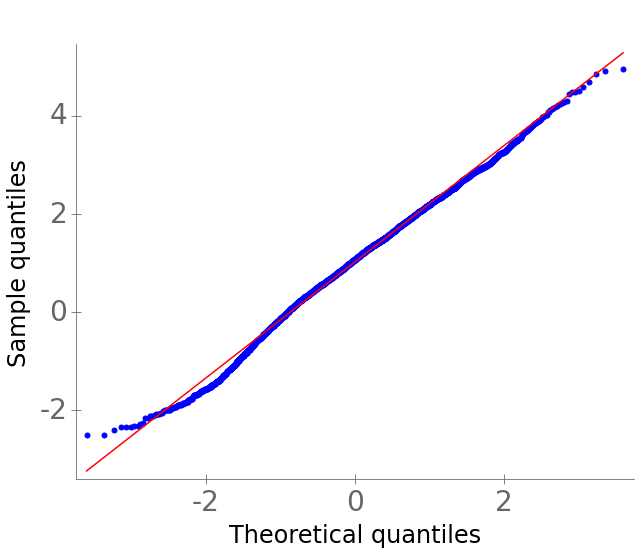

In [28]:
fig, ax = plt.subplots(figsize= (10,8))
plt.rcParams.update({'font.size': 28})


ax.tick_params(axis='x', length=10)
ax.tick_params(axis='y', length=10)

ax.yaxis.set_label_coords(-0.08, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)



stats.probplot(log10_kcat_values, dist="norm", plot=ax)
ax.set_title(" ")
plt.ylabel("Sample quantiles", fontsize = 24)
plt.xlabel("Theoretical quantiles", fontsize = 24)
plt.savefig(join("..","..", "data", "figures", "S1b.svg"))
plt.show()

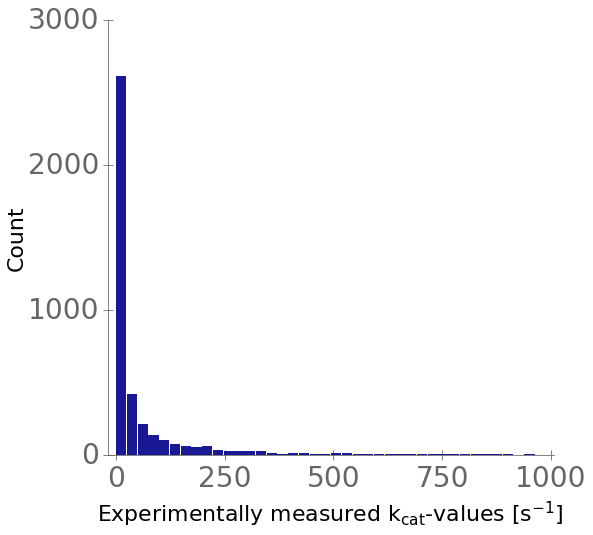

In [29]:
fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({'font.size': 28})


plt.ylim(ymax = 2500, ymin = 0)
#plt.xlim(xmax = 5, xmin = -0.1)

ax.tick_params(axis='x', length=10)
ax.tick_params(axis='y', length=10)

ax.yaxis.set_label_coords(-0.18, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

plt.yticks([0,1000,2000,3000], ["0","1000","2000","3000"])
plt.xticks([0,250,500, 750, 1000], ["0","250","500", "750", "1000"])

plt.ylabel("Count", fontsize = 22)
plt.xlabel("Experimentally measured $k_{cat}$-values [$s^{-1}$]", fontsize = 22)
plt.hist(kcat_values[kcat_values<1000], alpha = 0.9, color="darkblue", rwidth = 0.95, bins = 40)
plt.show()

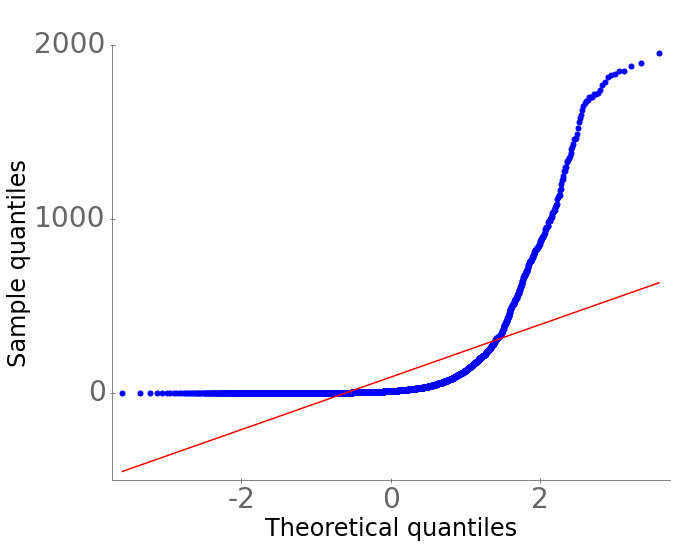

In [30]:
fig, ax = plt.subplots(figsize= (10,8))
plt.rcParams.update({'font.size': 28})


#plt.ylim(ymax = 2500, ymin = -100)
#plt.xlim(xmax = 2500, xmin = -100)
#plt.xlim(xmax = 5, xmin = -0.1)

#ax.yaxis.set_label_coords(-0.08, 0.5)
#ax.xaxis.set_label_coords(0.5, -0.1)

stats.probplot(kcat_values[kcat_values<2000], dist="norm", plot=ax)
ax.set_title(" ")
plt.yticks([0,1000,2000], ["0","1000","2000"])
plt.ylabel("Sample quantiles", fontsize = 24)
plt.xlabel("Theoretical quantiles", fontsize = 24)
plt.savefig(join("..","..", "data", "figures", "S1a.svg"))
plt.show()

## Calculating how much mean deviation we have between two measurements for the same enzyme-reaction pair:

In [31]:
df_kcat = pd.read_pickle(join("..", "..", "data", "kcat_data", "merged_and_grouped_kcat_dataset_with_FPs_and_ESM1bs_ts.pkl"))
df = pd.DataFrame({"Reaction": df_kcat["Reaction ID"], "Sequence" : df_kcat["Sequence ID"],
                  "kcats" :df_kcat["kcat_values"]})
df.head()

,Reaction,Sequence,kcats
0,Reaction_0,Sequence_309,"[2.8, 0.05, 0.11, 205.0, 2.3, 134.0, 360.0]"
1,Reaction_1,Sequence_309,"[1.2, 3.4, 0.61, 0.07]"
2,Reaction_2,Sequence_3142,"[6.18, 14.5, 11.58, 13.12, 11.9, 13.98, 14.08,..."
3,Reaction_4,Sequence_3263,"[57.1, 19.6, 5.96, 13.6, 26.4, 14.0, 41.1, 11...."
4,Reaction_5,Sequence_2101,"[2.98, 0.87]"


In [32]:
deviations = []
x_value = []
y_value = []

for ind in df.index:
    kcats = df["kcats"][ind]
    if len(kcats) > 1 :
        for i in range(len(kcats)):
            for j in range(i+1, len(kcats)):
                
                deviations.append(abs(np.log10(float(kcats[i])) - np.log10(float(kcats[j]))))
                x_value.append(np.log10(float(kcats[i])))
                y_value.append(np.log10(float(kcats[j])))

                
np.round(np.mean(deviations),2), np.round(10**np.mean(deviations),2)

(0.75, 5.67)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


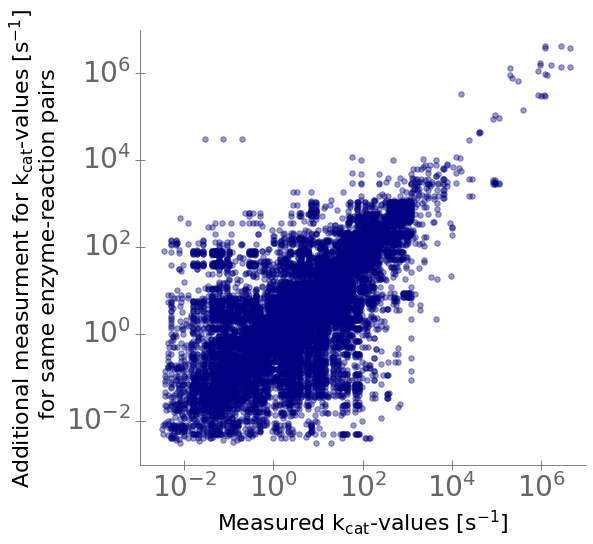

In [33]:
deviations = []
x_value = []
y_value = []

for ind in df.index:
    kcats = df["kcats"][ind]
    if len(kcats) > 1 :
        for i in range(len(kcats)):
            for j in range(i+1, len(kcats)):
                if np.log10(float(kcats[i])) > -2.5 and np.log10(float(kcats[j])) > -2.5:
                    deviations.append(abs(np.log10(float(kcats[i])) - np.log10(float(kcats[j]))))
                    x_value.append(np.log10(float(kcats[i])))
                    y_value.append(np.log10(float(kcats[j])))
                
                
np.round(np.mean(deviations),2), np.round(10**np.mean(deviations),2)

x_value = np.array(x_value)
y_value = np.array(y_value)

fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({'font.size': 28})



x0, x1, y0, y1 = -3, 7, -3,7
plt.ylim(ymax = y1, ymin = y0)
plt.xlim(xmax = x1, xmin = x0)

ax.tick_params(axis='x', length=10)
ax.tick_params(axis='y', length=10)

ax.yaxis.set_label_coords(-0.18, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

plt.xticks([-2,0,2,4,6], ["$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$", "$10^{6}$"])
plt.yticks([-2,0,2,4,6], ["$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$", "$10^{6}$"])



'''reg = LinearRegression().fit(x_value.reshape(-1,1), y_value.reshape(-1,1),)
reg.score(x_value.reshape(-1,1), y_value.reshape(-1,1))
beta0, beta1 =reg.intercept_[0], reg.coef_[0][0]
plt.plot([x0,x1], [y0,y1], color='grey', alpha = 0.3, linestyle='dashed')
plt.plot([x0,x1], [beta0 + x0*beta1, beta0 + x1*beta1], color='red', alpha = 0.6, linestyle='dashed')
''';
plt.xlabel("Measured $k_{cat}$-values [$s^{-1}$]", fontsize = 22)
plt.ylabel("Additional measurment for $k_{cat}$-values [$s^{-1}$] \n \
for same enzyme-reaction pairs", fontsize = 22)

plt.scatter(x_value, y_value, alpha = 0.4, s=30, c="navy")

    

plt.savefig(join("..","..", "data", "figures", "measured_vs_measured.eps"))
plt.savefig(join("..","..", "data", "figures", "measured_vs_measured.png"))
plt.show()

## Calculating kcat measurements and predictions for different EC classes:

In [34]:
data_train = pd.read_pickle(join("..", "..", "data", "kcat_data", "splits", "train_df_kcat.pkl"))
data_test = pd.read_pickle(join("..", "..", "data", "kcat_data", "splits", "test_df_kcat.pkl"))
data_train.rename(columns = {"geomean_kcat" :"log10_kcat"}, inplace = True)
data_test.rename(columns = {"geomean_kcat" :"log10_kcat"}, inplace = True)

model = "ESM1b_ts_DRFP_mean"

pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + model + ".npy"))
test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + model + ".npy"))
data_test["y_pred"] = pred_y

In [35]:
EC_kcat =[[] for _ in range(6)]

for ind in data_train.index:
    try:
        EC = int(data_train["ECs"][ind][0][0])
        EC_kcat[EC-1].append(data_train["log10_kcat"][ind])
    except IndexError:
        pass
    
EC_kcat_pred =[[] for _ in range(6)]

for ind in data_test.index:
    try:
        EC = int(data_test["ECs"][ind][0][0])
        EC_kcat[EC-1].append(data_test["log10_kcat"][ind])
        EC_kcat_pred[EC-1].append(data_test["y_pred"][ind])
    except IndexError:
        pass

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


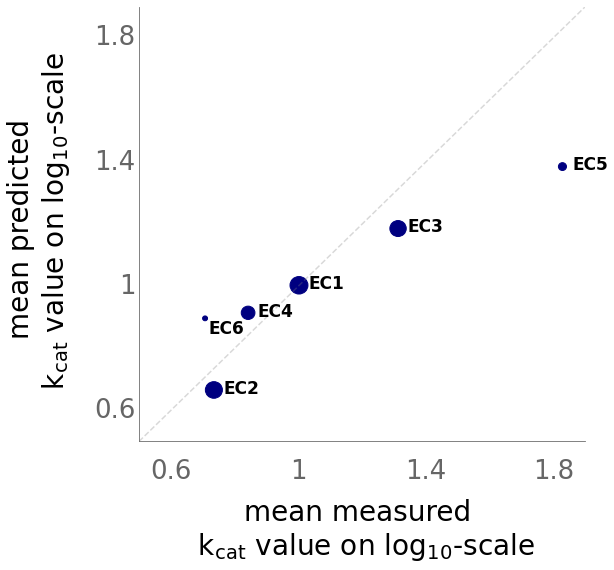

In [36]:
fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({'font.size': 28})

classes = [str(i) for i in range(1,7)]
#100 -8
for i in range(len(EC_kcat)):
    
    
    
    circle = plt.Circle((np.mean(EC_kcat[i]), np.mean(EC_kcat_pred[i]) ),
                        np.sqrt(len(EC_kcat_pred[i]))/500, color='navy', fill = True)
    ax.add_artist(circle)
    if i ==5:
        ax.annotate("EC"+ str(i+1), (np.mean(EC_kcat[i])+0.01, np.mean(EC_kcat_pred[i])-0.05), fontsize=17, c='black', weight = "bold")
    else:
        ax.annotate("EC"+ str(i+1), (np.mean(EC_kcat[i])+0.03, np.mean(EC_kcat_pred[i])-0.01), fontsize=17, c='black', weight = "bold")
    

ticks2 = [0.6,1,1.4,1.8]
labs = ticks2
ax.set_xticks(ticks2)
ax.set_xticklabels(labs,  y= -0.03, fontsize=26)
ax.tick_params(axis='x', length=0, rotation = 0)

ax.set_yticks(ticks2)
ax.set_yticklabels(labs,  y= -0.03, fontsize=26)
ax.tick_params(axis='y', length=0, rotation = 0)

plt.ylim((0.5,1.9))
plt.xlim((0.5, 1.9))
plt.legend(loc = "upper left", fontsize=20)
plt.xlabel('mean measured \n $k_{cat}$ value on $\log_{10}$-scale')
plt.ylabel('mean predicted \n $k_{cat}$ value on $\log_{10}$-scale')
ax.yaxis.set_label_coords(-0.15, 0.5)
ax.xaxis.set_label_coords(0.5,-0.13)

plt.plot([0.5,1.9], [0.5,1.9], color='grey', alpha = 0.3, linestyle='dashed')
plt.savefig(join("..","..", "data", "figures", "EC_classes_mean_kcat.eps"))
plt.show()

## Comparing different reaction similarities:

In [37]:
import pickle

In [38]:
model = 'ESM1b_ts_DRFP_mean'

data_train = pd.read_pickle(join("..", "..", "data", "kcat_data", "splits", "train_df_kcat.pkl"))
data_test = pd.read_pickle(join("..", "..", "data", "kcat_data", "splits", "test_df_kcat.pkl"))
data_train.rename(columns = {"geomean_kcat" :"log10_kcat"}, inplace = True)
data_test.rename(columns = {"geomean_kcat" :"log10_kcat"}, inplace = True)

pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + model + ".npy"))
test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + model + ".npy"))
data_test["y_pred"] = pred_y
data_test["y_true"] = test_y


train_fps = [np.array(list(data_train["structural_fp"][ind][:3276])).reshape(1,-1).astype(int) for ind in data_train.index]
test_fps = [np.array(list(data_test["structural_fp"][ind][:3276])).reshape(1,-1).astype(int) for ind in data_test.index]


max_sim = []

for fp in test_fps:
    jaccard_sim = np.array([1- scipy.spatial.distance.cdist(fp,train_fp, metric='jaccard')[0][0] for train_fp in train_fps])
    max_sim.append(np.max(jaccard_sim))
    
data_test["reaction_sim"] = max_sim

data_test["reaction_sim"]= (data_test["reaction_sim"] - np.min(data_test["reaction_sim"]))
data_test["reaction_sim"] = data_test["reaction_sim"]/np.max(data_test["reaction_sim"])

data_test["y_true"] = test_y

In [39]:
'''all_fps = list(set(data_train["structural_fp"] + data_train["structural_fp"]))

with open(join("..", "..", "data", "reaction_data", 'all_structural_fps.pkl'), 'wb') as f:
    pickle.dump(all_fps, f)
    
    
with open(join("..", "..", "data", "reaction_data", 'all_structural_fps.pkl'), 'rb') as f:
    all_fps = pickle.load(f)''';

0.0 - 0.4 0.06430806812248102 0.28800920705781385 1.255855379466648 17
0.4 - 0.8 0.2007273222088296 0.47469369882327617 1.3067111634862465 129
0.8 - 1 0.4141624233212502 0.65263923852372 0.9083716908949246 350
identical: 0.571383822236111 0.7787732209816836 0.5057315733031261 354


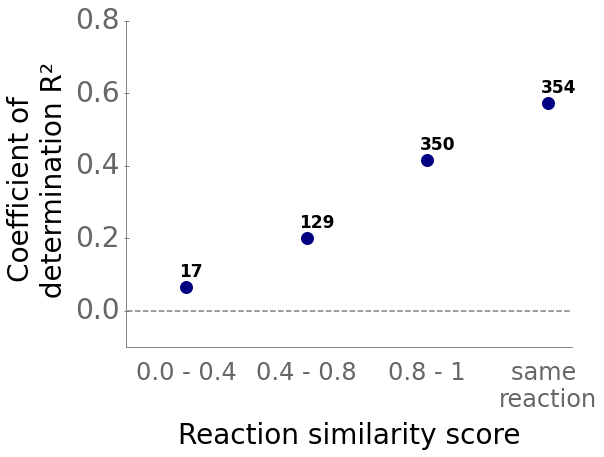

In [40]:
train_reactions = list(set(data_train["Reaction ID"]))
data_test["new reaction"] = [r_ID not in train_reactions for r_ID in list(data_test["Reaction ID"])]

help_df = data_test.loc[data_test["new reaction"]]


sim_bins_lb = [0.0, 0.4, 0.8]
sim_bins_ub = [0.4, 0.8, 1]
r2_scores, n_points, pearson_r = [], [], []
for i in range(len(sim_bins_lb)):
    help_df2 = help_df.loc[help_df["reaction_sim"] <= sim_bins_ub[i]].loc[help_df["reaction_sim"] >= sim_bins_lb[i]]
    pred = np.array(help_df2["y_pred"])
    true = np.array(help_df2["y_true"])
    r2_scores.append(r2_score(true, pred))
    pearson_r.append(stats.pearsonr(true, pred)[0])
    mse = np.mean(abs(true - pred)**2)
    n_points.append(len(pred))
    print("%s - %s" % (sim_bins_lb[i], sim_bins_ub[i]), r2_scores[-1], pearson_r[-1], mse, len(pred))
    
help_df = data_test.loc[~data_test["new reaction"]]    

pred = np.array(help_df["y_pred"])
true = np.array(help_df["y_true"])
r2_scores.append(r2_score(true, pred))
pearson_r.append(stats.pearsonr(true, pred)[0])
mse = np.mean(abs(true - pred)**2)
n_points.append(len(pred))
print("identical:",  r2_scores[-1], pearson_r[-1], mse, len(pred))

plt.rcParams.update({'font.size': 28})

#plt.rc('font', **font)

fig, ax = plt.subplots(figsize= (8,6))

for i in range(len(sim_bins_lb) + 1):    
    plt.scatter(i, r2_scores[i], c='navy', marker="o", linewidths= 8)
    ax.annotate(n_points[i], (i-0.06, r2_scores[i]+0.03), fontsize=17, c= "black", weight = "bold")



plt.xlabel('Reaction similarity score')
plt.ylabel('Coefficient of \n determination R²')
ax.yaxis.set_label_coords(-0.13, 0.5)
ax.xaxis.set_label_coords(0.5,-0.23)

ticks2 = np.array(range(len(sim_bins_lb)+1))
labs = ["%s - %s" % (sim_bins_lb[i], sim_bins_ub[i]) for i in range(len(sim_bins_lb))] +["same \nreaction"]
ax.set_xticks(ticks2)
ax.set_xticklabels(labs,  y= -0.03, fontsize=24)
ax.tick_params(axis='x', length=0, rotation = 0)

plt.ylim((-0.1,0.8))
plt.xlim((-0.5, 3.2))

plt.plot([-0.49, 4], [0,0], color='grey', linestyle='dashed')
plt.savefig(join("..","..", "data", "figures", "Reaction_Similarity_Score.eps"))
plt.show()

In [41]:
data_test["y_pred"] = pred_y
data_test["y_true"] = test_y

pred = data_test["y_pred"].loc[data_test["new reaction"]]
true = data_test["y_true"].loc[data_test["new reaction"]]

MSE = np.mean(abs(np.reshape(true, (-1)) - pred)**2)
R2 = r2_score(np.reshape(true, (-1)), pred)
pearson_r = stats.pearsonr(true, pred)[0]
print(len(true), MSE, R2, pearson_r)

pred = data_test["y_pred"].loc[~data_test["new reaction"]]
true = data_test["y_true"].loc[~data_test["new reaction"]]

MSE = np.mean(abs(np.reshape(true, (-1)) - pred)**2)
R2 = r2_score(np.reshape(true, (-1)), pred)
pearson_r = stats.pearsonr(true, pred)[0]
print(len(true), MSE, R2, pearson_r)

496 1.023881801116698 0.34994372195140233 0.6011238358501336
354 0.5057315733031263 0.571383822236111 0.7787732209816836


## Performance for membrane proteins vs. non-membrane proteins

In [42]:
data_test = pd.read_pickle(join("..", "..", "data", "kcat_data", "splits", "test_df_kcat.pkl"))

pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + model + ".npy"))
test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + model + ".npy"))

data_test["y_true"] = np.round(test_y,5)
data_test["y_pred"] = np.round(pred_y,5)

Creating input file for UniProt mapping service

In [43]:
IDs = []
for ind in data_test.index:
    IDs = IDs+ data_test["Uniprot IDs"][ind]

IDs = list(set(IDs))    
f = open(join("..", "..", "data", "enzyme_data", "UNIPROT_IDs_test_set.txt"), "w") 
for ID in IDs:
    f.write(str(ID) + "\n")
f.close()

Loading results from UniProt

In [44]:
df_location = pd.read_csv(join("..", "..", "data", "enzyme_data",
                 "uniprot-download_true_fields_accession_2Ccc_subcellular_location_for-2023.04.13-18.49.21.41.tsv"), sep = "\t")

data_test["membrane"] = False

for ind in data_test.index:
    IDs = list(set(data_test["Uniprot IDs"][ind]))
    for ID in IDs:
        try:
            location = list(df_location["Subcellular location [CC]"].loc[df_location["From"] == ID])[0]
            if not pd.isnull(location):
                if "membrane" in location.lower():
                    data_test["membrane"][ind] = True
                    #print(location)
        except IndexError:
            pass
        
is_membrane = np.array(data_test["membrane"])
np.sum(is_membrane)

63

In [45]:
print(r2_score(test_y[is_membrane], pred_y[is_membrane]), r2_score(test_y[~is_membrane], pred_y[~is_membrane]))
print(stats.pearsonr(test_y[is_membrane], pred_y[is_membrane])[0], stats.pearsonr(test_y[~is_membrane], pred_y[~is_membrane])[0])
print(np.mean(abs(test_y[is_membrane] - pred_y[is_membrane])**2), np.mean(abs(test_y[~is_membrane] - pred_y[~is_membrane])**2))

0.3605761664082414 0.43880739645243383
0.6478576822890754 0.6724504396913856
0.683574459043685 0.8180548403855614


In [46]:
np.var(test_y[is_membrane]), np.var(test_y[~is_membrane])

(1.0690475129835626, 1.4577078087170903)